# Plot AlphaFold pLDDT for residue mutations

This notebook shows how to plot average pLDDT from AlphaFold pdb for residues of interests.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

colspecs = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]

names = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'pLDDT', 'element', 'charge']

In [2]:
pdbs = ["CA2D3_WT_fly.pdb", "CA2D3_DSS_fly.pdb", "CA2D3_RLR_fly.pdb"]
gtypes = ["WT", "DSS", "RLR"]

# this is the residue sequence to compute pLDDT
resseqs = {"RLR": [253, 254, 255], "DSS": [273, 275, 277]}

In [3]:
res = []
for i in range(len(pdbs)):
    pdb_path = "./pdb/{}".format(pdbs[i])
    gtype = gtypes[i]
    pdb = pd.read_fwf(pdb_path, names=names, colspecs=colspecs)

    for k in resseqs:
        resseq = resseqs[k]
        for s in resseq:
            pLDDT = pdb[pdb["resseq"] == s].pLDDT.mean()
            res.append([gtype, s, pLDDT])

dfr = pd.DataFrame(res, columns=["genotype", "resseq", "pLDDT"])
df_pLDDT = pd.pivot_table(dfr, values="pLDDT", index=["genotype"], columns=["resseq"])
df_pLDDT

resseq,253,254,255,273,275,277
genotype,,,,,,
DSS,94.06,92.19,91.81,92.75,85.62,83.25
RLR,90.81,89.94,90.75,94.69,92.81,88.06
WT,93.81,92.19,91.56,94.56,92.12,87.50


this version uses a linear color gradient.

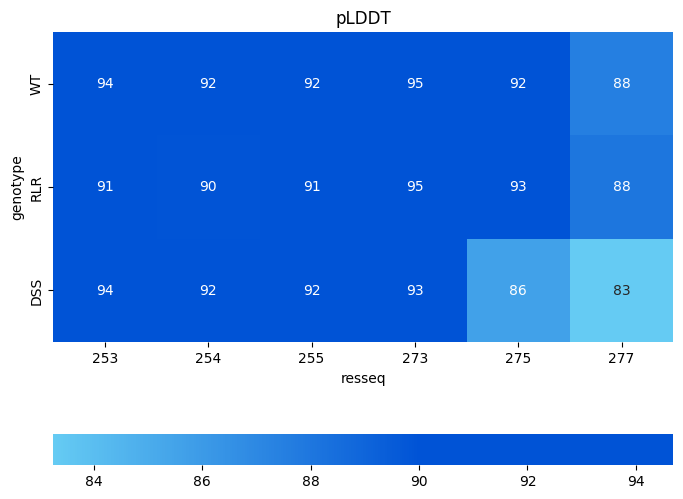

In [4]:
cvals = [df_pLDDT.min().min(), 90, df_pLDDT.max().max()]
# these are AlphaFold colors
colors = ["#65CBF3", "#0053D6", "#0053D6"]

norm = plt.Normalize(min(cvals), max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

figsize = (8, 8)

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(
    df_pLDDT.sort_index(ascending=False),
    cmap=cmap,
    annot=True,
    square=True,
    ax=ax,
    cbar_kws={"orientation": "horizontal"},
)
ax.set_title("pLDDT")
fig.savefig("alphafold2_ad2b_pLDDT_v0.pdf", bbox_inches="tight")
fig.savefig("alphafold2_ad2b_pLDDT_v0.svg", bbox_inches="tight")

this version uses separate colors.

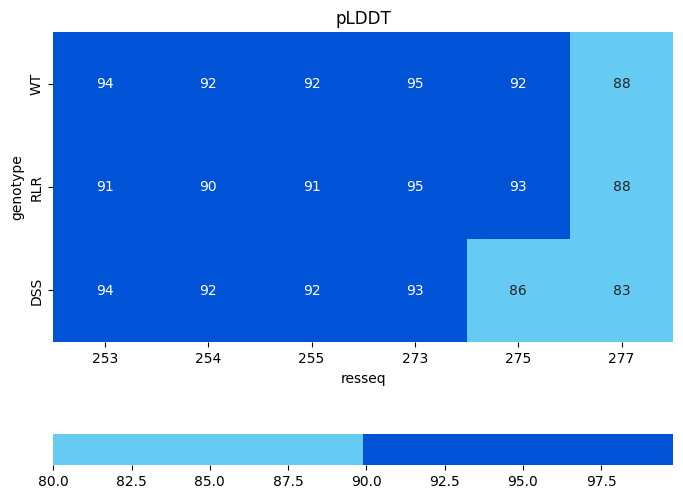

In [5]:
figsize = (8, 8)

fig, ax = plt.subplots(1, 1, figsize=figsize)
sns.heatmap(
    df_pLDDT.sort_index(ascending=False),
    cmap=["#65CBF3", "#0053D6"],
    annot=True,
    square=True,
    ax=ax,
    vmin=80,
    vmax=99.8,
    cbar_kws={"orientation": "horizontal"},
)
ax.set_title("pLDDT")
fig.savefig("alphafold2_ad2b_pLDDT_v1.pdf", bbox_inches="tight")
fig.savefig("alphafold2_ad2b_pLDDT_v1.svg", bbox_inches="tight")
